### Install & Import Libraries

In [1]:
! pip install --quiet -U pycaret

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scattertext 0.1.4 requires gensim>=4.0.0, but you have gensim 3.8.3 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.3 which is incompatible.
matrixprofile 1.1.10 requires protobuf==3.11.2, but you have protobuf 3.18.0 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
from pycaret.classification import *

pd.set_option("display.max_columns", None)

### Import Dataset

In [3]:
df = pd.read_csv('output/lending-with-FT.csv')

### Overview of Selected Dataset

In [4]:
df.shape

(28088, 353)

In [5]:
df.head()

,index,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,loan_diff_years,state,zip_code,annual_inc + dti,annual_inc + installment,annual_inc + int_rate,annual_inc + loan_amnt,annual_inc + loan_diff_years,annual_inc + mort_acc,annual_inc + open_acc,annual_inc + pub_rec,annual_inc + pub_rec_bankruptcies,annual_inc + revol_bal,annual_inc + revol_util,annual_inc + total_acc,dti + installment,dti + int_rate,dti + loan_amnt,dti + loan_diff_years,dti + mort_acc,dti + open_acc,dti + pub_rec,dti + pub_rec_bankruptcies,dti + revol_bal,dti + revol_util,dti + total_acc,installment + int_rate,installment + loan_amnt,installment + loan_diff_years,installment + mort_acc,installment + open_acc,installment + pub_rec,installment + pub_rec_bankruptcies,installment + revol_bal,installment + revol_util,installment + total_acc,int_rate + loan_amnt,int_rate + loan_diff_years,int_rate + mort_acc,int_rate + open_acc,int_rate + pub_rec,int_rate + pub_rec_bankruptcies,int_rate + revol_bal,int_rate + revol_util,int_rate + total_acc,loan_amnt + loan_diff_years,loan_amnt + mort_acc,loan_amnt + open_acc,loan_amnt + pub_rec,loan_amnt + pub_rec_bankruptcies,loan_amnt + revol_bal,loan_amnt + revol_util,loan_amnt + total_acc,loan_diff_years + mort_acc,loan_diff_years + open_acc,loan_diff_years + pub_rec,loan_diff_years + pub_rec_bankruptcies,loan_diff_years + revol_bal,loan_diff_years + revol_util,loan_diff_years + total_acc,mort_acc + open_acc,mort_acc + pub_rec,mort_acc + pub_rec_bankruptcies,mort_acc + revol_bal,mort_acc + revol_util,mort_acc + total_acc,open_acc + pub_rec,open_acc + pub_rec_bankruptcies,open_acc + revol_bal,open_acc + revol_util,open_acc + total_acc,pub_rec + pub_rec_bankruptcies,pub_rec + revol_bal,pub_rec + revol_util,pub_rec + total_acc,pub_rec_bankruptcies + revol_bal,pub_rec_bankruptcies + revol_util,pub_rec_bankruptcies + total_acc,revol_bal + revol_util,revol_bal + total_acc,revol_util + total_acc,annual_inc / dti,annual_inc / installment,annual_inc / int_rate,annual_inc / loan_amnt,annual_inc / loan_diff_years,annual_inc / mort_acc,annual_inc / open_acc,annual_inc / pub_rec,annual_inc / pub_rec_bankruptcies,annual_inc / revol_bal,annual_inc / revol_util,annual_inc / total_acc,dti / annual_inc,dti / installment,dti / int_rate,dti / loan_amnt,dti / loan_diff_years,dti / mort_acc,dti / open_acc,dti / pub_rec,dti / pub_rec_bankruptcies,dti / revol_bal,dti / revol_util,dti / total_acc,installment / annual_inc,installment / dti,installment / int_rate,installment / loan_amnt,installment / loan_diff_years,installment / mort_acc,installment / open_acc,installment / pub_rec,installment / pub_rec_bankruptcies,installment / revol_bal,installment / revol_util,installment / total_acc,int_rate / annual_inc,int_rate / dti,int_rate / installment,int_rate / loan_amnt,int_rate / loan_diff_years,int_rate / mort_acc,int_rate / open_acc,int_rate / pub_rec,int_rate / pub_rec_bankruptcies,int_rate / revol_bal,int_rate / revol_util,int_rate / total_acc,loan_amnt / annual_inc,loan_amnt / dti,loan_amnt / installment,loan_amnt / int_rate,loan_amnt / loan_diff_years,loan_amnt / mort_acc,loan_amnt / open_acc,loan_amnt / pub_rec,loan_amnt / pub_rec_bankruptcies,loan_amnt / revol_bal,loan_amnt / revol_util,loan_amnt / total_acc,loan_diff_years / annual_inc,loan_diff_years / dti,loan_diff_years / installment,loan_diff_years / int_rate,loan_diff_years / loan_amnt,loan_diff_years / mort_acc,loan_diff_years / open_acc,loan_diff_years / pub_rec,loan_diff_years / pub_rec_bankruptcies,loan_diff_years / revol_bal,loan_diff_years / revol_util,loan_diff_years / total_acc,mort_acc / annual_inc,mort_acc / dti,mort_acc / installment,mort_acc / int_rate,mort_acc / loan_amnt,mort_acc / loan_diff_years,mort_acc / open_acc,mort_acc / pub_rec,mort_acc / pub_rec_bankruptci

#### Target Variable Proportions

In [6]:
df['loan_status'].value_counts(dropna=False) / len(df['loan_status'])

Fully Paid     0.868698
Charged Off    0.131302
Name: loan_status, dtype: float64

### Setup & Run Pycaret

* F1 was selected for optimization due to the imbalance in clases.

In [7]:
clf = setup(
    data = df, 
    target = 'loan_status', 
    silent=True, 
    log_experiment = True, 
    session_id=1, 
    fix_imbalance=True, 
    experiment_name = 'train',
    high_cardinality_features = [
        'emp_title', 
        'zip_code',
    ],
    ordinal_features = {
        'grade': ['A','B','C','D','E','F','G'],
        'emp_length': [
            '< 1 year', 
            '1 year', 
            '2 years', 
            '3 years', 
            '4 years',
            '5 years', 
            '6 years', 
            '7 years', 
            '8 years', 
            '9 years',
            '10+ years',
        ]
    }
    
)

,Description,Value
0,session_id,1
1,Target,loan_status
2,Target Type,Binary
3,Label Encoded,"Charged Off: 0, Fully Paid: 1"
4,Original Data,"(28088, 353)"
5,Missing Values,True
6,Numeric Features,339
7,Categorical Features,13
8,Ordinal Features,True
9,High Cardinality Features,True


In [8]:
bestModel = compare_models(sort = 'F1', fold = 3, exclude = ['gbc'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9221,0.9077,0.9936,0.9226,0.9568,0.5669,0.6105,71.1800
lightgbm,Light Gradient Boosting Machine,0.9210,0.9077,0.9904,0.9240,0.9561,0.5683,0.6046,5.4733
xgboost,Extreme Gradient Boosting,0.9196,0.8980,0.9869,0.9254,0.9552,0.5686,0.5981,78.7067
rf,Random Forest Classifier,0.9175,0.8368,0.9936,0.9181,0.9543,0.5322,0.5819,9.3967
et,Extra Trees Classifier,0.9168,0.8293,0.9924,0.9184,0.9540,0.5315,0.5783,4.7600
ada,Ada Boost Classifier,0.9148,0.8995,0.9822,0.9244,0.9524,0.5489,0.5734,15.9200
dt,Decision Tree Classifier,0.8663,0.7404,0.9115,0.9330,0.9221,0.4514,0.4531,3.1200
lda,Linear Discriminant Analysis,0.8330,0.8124,0.8654,0.9375,0.9000,0.3996,0.4119,1.5733
ridge,Ridge Classifier,0.8326,0.0000,0.8649,0.9374,0.8997,0.3986,0.4109,0.5233
nb,Naive Bayes,0.6696,0.6022,0.7213,0.8855,0.7569,0.0211,0.0384,0.4600


In [9]:
bestModel

In [10]:
bestModel = tune_model(bestModel, optimize = 'F1', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9329,0.9171,0.9965,0.9310,0.9626,0.6364,0.6743
1,0.9278,0.9091,0.9965,0.9260,0.9599,0.5989,0.6439
2,0.9323,0.9282,0.9977,0.9296,0.9624,0.6282,0.6704
3,0.9171,0.9000,0.9971,0.9151,0.9543,0.5164,0.5796
4,0.9252,0.9232,0.9953,0.9244,0.9585,0.5839,0.6287
5,0.9176,0.9108,0.9924,0.9192,0.9544,0.5366,0.5825
6,0.9191,0.9129,0.9941,0.9193,0.9552,0.5423,0.5917
7,0.9181,0.8969,0.9941,0.9182,0.9547,0.5367,0.5872
8,0.9237,0.9016,0.9965,0.9219,0.9577,0.5711,0.6215
9,0.9217,0.9017,0.9965,0.9199,0.9567,0.5559,0.6094


### SHAP (SHapley Additive exPlanations) 

2021-10-13 12:25:22.593343: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-13 12:25:22.594355: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


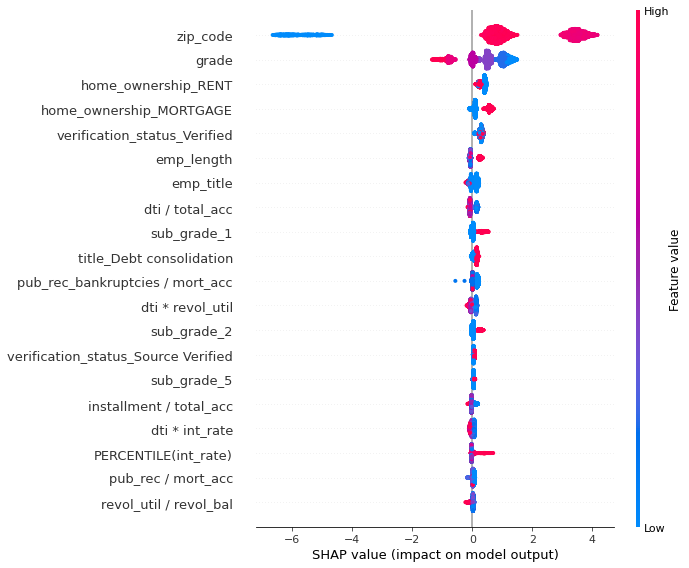

In [11]:
interpret_model(bestModel)

### Evaluate Model

#### Area Under the Curve

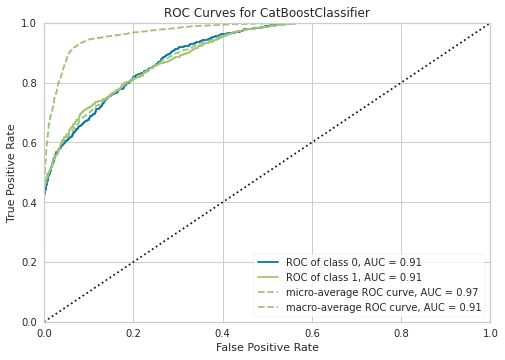

In [12]:
plot_model(bestModel, plot = 'auc')

#### Discrimination Threshold

In [13]:
# plot_model(bestModel, plot = 'threshold')

#### Precision Recall Curve

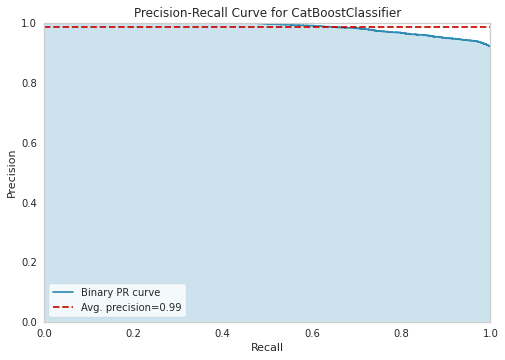

In [14]:
plot_model(bestModel, plot = 'pr')

#### Confusion Matrix

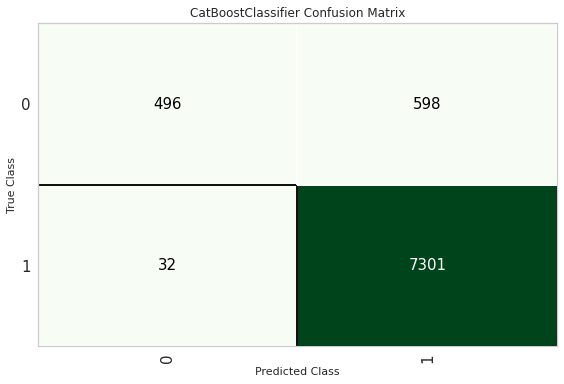

In [15]:
plot_model(bestModel, plot = 'confusion_matrix')

#### Class Prediction Error

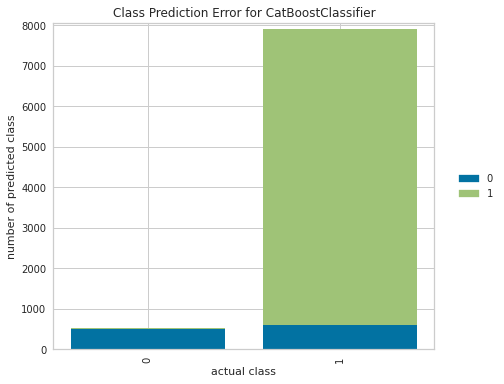

In [16]:
plot_model(bestModel, plot = 'error')

#### Classification Report

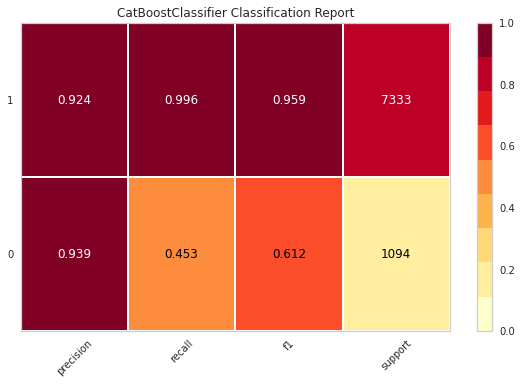

In [17]:
plot_model(bestModel, plot = 'class_report')

#### Decision Boundary

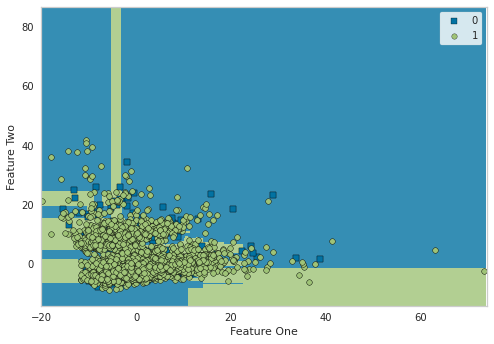

In [18]:
plot_model(bestModel, plot = 'boundary')

#### Recursive Feature Selection

In [19]:
# plot_model(bestModel, plot = 'rfe')

#### Learning Curve

In [20]:
# plot_model(bestModel, plot = 'learning')

#### Manifold Learning

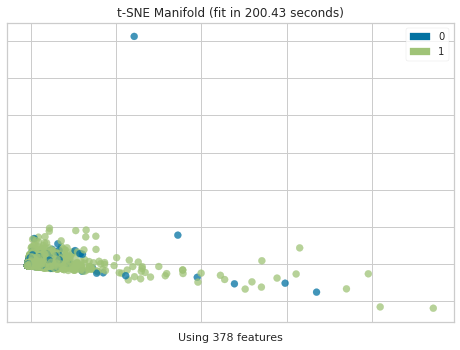

In [21]:
plot_model(bestModel, plot = 'manifold')

#### Calibration Curve

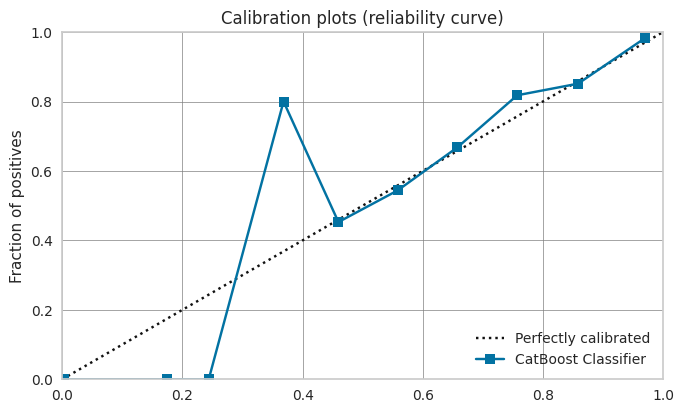

In [22]:
plot_model(bestModel, plot = 'calibration')

#### Validation Curve

In [23]:
# plot_model(bestModel, plot = 'vc')

#### Dimension Learning

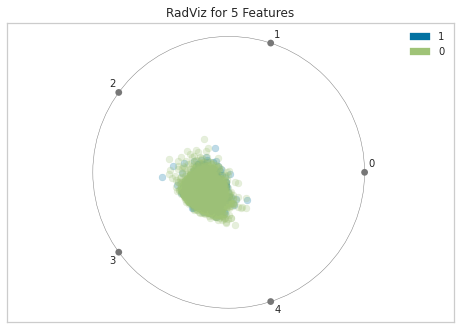

In [24]:
plot_model(bestModel, plot = 'dimension')

#### Feature Importance

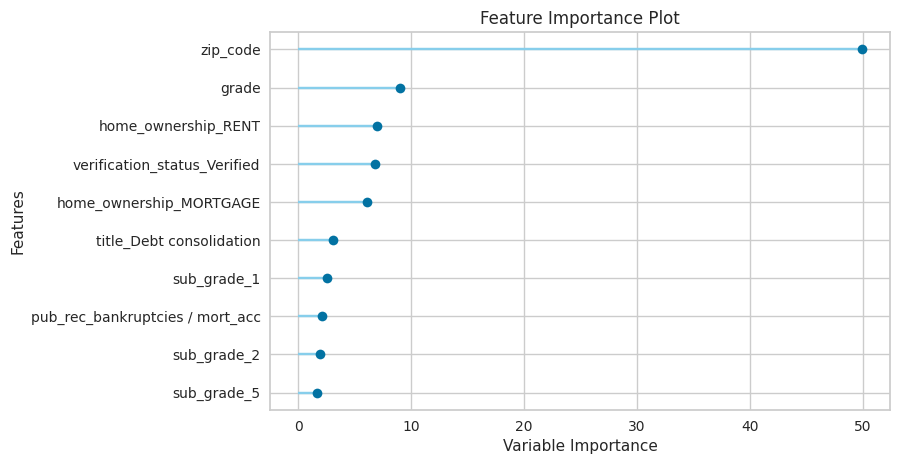

In [25]:
plot_model(bestModel, plot = 'feature')

#### Model Hyperparameter

In [26]:
plot_model(bestModel, plot = 'parameter')

,Parameters
nan_mode,Min
eval_metric,Logloss
iterations,180
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


### Predict on test / hold-out Sample

In [27]:
pred_holdout = predict_model(bestModel)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9252,0.9117,0.9956,0.9243,0.9586,0.5757,0.6227


### Save Model

In [28]:
save_model(bestModel, 'bestBaseModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=['index'],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='loan_status', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='loan_status')),
                 ('fix_perfect', Remove_100(target='loan_status')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthroug